In [1]:
import os
import numpy as np 

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
from tensorflow.keras.utils import plot_model

In [3]:
import pandas as pd 

In [4]:
import scipy

In [5]:
import cv2

In [6]:
train_dir = r'C:\Users\jivit\Documents\Datasets\kaggle ASL alphabets 25-09-2021\asl_alphabet_train\asl_alphabet_train'

In [7]:
categories = os.listdir(train_dir)
len(categories)

29

In [8]:
categories

['A',
 'B',
 'C',
 'D',
 'del',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [9]:
count = 0
train_images_names_and_paths = {}

for i in categories:
    train_images_names_and_paths[i] = os.listdir(train_dir + '/' + i)
    count += len(os.listdir(train_dir + '/' + i))
    
print('total count of train images is:', count)

total count of train images is: 87000


In [10]:
train_dir + '/' + list(train_images_names_and_paths.keys())[0] + '/' + list(train_images_names_and_paths.values())[0][0]

'C:\\Users\\jivit\\Documents\\Datasets\\kaggle ASL alphabets 25-09-2021\\asl_alphabet_train\\asl_alphabet_train/A/A1.jpg'

In [11]:
# img = plt.imread(train_dir + '/' + list(train_images_names_and_paths.keys())[0] + '/' + list(train_images_names_and_paths.values())[0][0], 0)
img = cv2.imread(train_dir + '/' + list(train_images_names_and_paths.keys())[0] + '/' + list(train_images_names_and_paths.values())[0][1])
img

array([[[252,   6,   0],
        [248,   2,   0],
        [243,   0,   4],
        ...,
        [247,   0,   7],
        [250,   0,   0],
        [251,   3,   0]],

       [[249,   3,   0],
        [234,   2,   0],
        [207,   5,  12],
        ...,
        [195,   3,  14],
        [211,   3,   5],
        [224,   8,   3]],

       [[246,   0,   6],
        [210,   5,  14],
        [147,  27,  38],
        ...,
        [248, 175, 191],
        [255, 165, 174],
        [163,   8,  12]],

       ...,

       [[245,   1,   9],
        [193,   5,  11],
        [203, 127, 128],
        ...,
        [159, 129, 142],
        [227, 123, 134],
        [148,  10,  18]],

       [[247,   0,   0],
        [218,   7,  10],
        [255, 119, 121],
        ...,
        [226, 123, 130],
        [255, 113, 117],
        [176,  10,  11]],

       [[251,   1,   0],
        [227,   5,   5],
        [173,   9,  10],
        ...,
        [150,  13,  17],
        [179,  11,  10],
        [190,   9,   7]]

In [12]:
img.shape

(200, 200, 3)

In [13]:
def shs(img):
    img = img.astype('uint8')
    # print(img.dtype)
    # img = cv2.resize(img,(96,96))
    new_img = img
    # print(new_img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(img.shape)
    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU,)
    img2 = cv2.medianBlur(image_result, 15, 0)
    masked = cv2.bitwise_and(new_img, new_img, mask = img2)
    # print(type(masked))
    # print(masked)
    # masked = masked/.255
    masked = masked.astype('float32')
    # print(masked)
    # print(masked.dtype)
    return masked

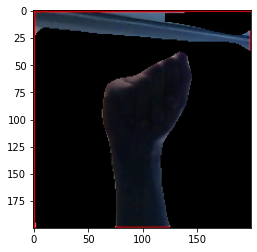

In [14]:
plt.imshow(shs(img).astype('uint8'))

In [15]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255, preprocessing_function = shs, dtype= np.uint8)

train_generated = data_generator.flow_from_directory(train_dir,                       
                                                     target_size = (200,200),         
                                                     class_mode = 'categorical',
                                                     color_mode = 'rgb',
                                                     shuffle = True,
                                                     batch_size = 32                  
                                                                                      
)

Found 87000 images belonging to 29 classes.


In [16]:
train_generated

In [17]:
train_generated.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

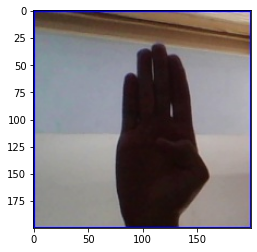

In [18]:
img = plt.imread(train_dir + '/' + list(train_images_names_and_paths.keys())[1] + '/' + list(train_images_names_and_paths.values())[1][0])
plt.imshow(img)

In [19]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [20]:
def get_model():
    
    tf.debugging.set_log_device_placement(True)
    SIZE=64
    channels = 3
    model = keras.models.Sequential([
           # keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(SIZE, SIZE, channels)),
            keras.layers.Conv2D( 32, kernel_size = 5, input_shape = (200,200,3), activation = 'relu'),
            keras.layers.MaxPool2D(pool_size = (2,2)),

            keras.layers.Conv2D( 64, kernel_size = 3, activation = 'relu'),
            keras.layers.MaxPool2D(pool_size = (2,2)),
            
            keras.layers.Conv2D( 64, kernel_size = 3, activation = 'relu'),
            keras.layers.MaxPool2D(pool_size = (2,2)),
            

            keras.layers.Conv2D( 128, kernel_size = 3, activation = 'relu'),
            keras.layers.MaxPool2D(pool_size = (2,2)),

            keras.layers.Flatten(),

            keras.layers.Dense(512, activation = 'relu'),
            keras.layers.Dropout(0.4),
            keras.layers.Dense(256, activation = 'relu'),
            keras.layers.Dropout(0.6),
            keras.layers.Dense(29, activation = 'softmax')   
            ]) 
    model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=[tf.keras.metrics.CategoricalCrossentropy()]
    )

    
    return model

In [21]:
model = get_model()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job

In [21]:
model = get_model()

model.fit(train_generated, epochs = 5)

model.save("final_v3")

reconstructed_model = keras.models.load_model("final_v3")

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StaticRegexFullMatch in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Select in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StringJoin in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ShardedFilename in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableO

In [25]:
!pip3 install pydot

In [26]:
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [22]:
test_dir = r'C:\Users\jivit\Documents\Datasets\kaggle ASL alphabets 25-09-2021\asl_alphabet_test'

In [23]:
test_categories = os.listdir(test_dir)
len(test_categories)

1

In [24]:
count1 = 0
test_images_names_and_paths = {}

for i in test_categories:
    test_images_names_and_paths[i] = os.listdir(test_dir + '\\' + i)
    count1 += len(os.listdir(test_dir + '\\' + i))
    
print('total count of test images is:', count1)

total count of test images is: 28


In [25]:
test_dir + '/' + list(test_images_names_and_paths.keys())[0] + '/' + list(test_images_names_and_paths.values())[0][0]

'C:\\Users\\jivit\\Documents\\Datasets\\kaggle ASL alphabets 25-09-2021\\asl_alphabet_test/asl_alphabet_test/A_test.jpg'

In [26]:
img1 = plt.imread(test_dir + '/' + list(test_images_names_and_paths.keys())[0] + '/' + list(test_images_names_and_paths.values())[0][0])
img1

array([[[  1,   1, 255],
        [  0,   0, 250],
        [  2,   0, 247],
        ...,
        [  5,   0, 241],
        [  1,   1, 245],
        [  0,   5, 249]],

       [[  2,   1, 252],
        [  5,   3, 237],
        [ 11,   7, 208],
        ...,
        [ 16,   7, 196],
        [  2,   3, 209],
        [  0,   5, 219]],

       [[  1,   0, 241],
        [ 12,   8, 207],
        [ 82,  76, 186],
        ...,
        [120, 112, 189],
        [115, 112, 243],
        [ 12,  12, 170]],

       ...,

       [[  4,   0, 240],
        [ 10,   5, 193],
        [ 69,  68, 144],
        ...,
        [133, 129, 144],
        [131, 128, 219],
        [ 13,  14, 140]],

       [[  1,   0, 248],
        [ 14,  11, 222],
        [ 56,  54, 190],
        ...,
        [129, 129, 219],
        [116, 119, 252],
        [  9,  16, 169]],

       [[  2,   1, 252],
        [  2,   2, 224],
        [ 11,   8, 173],
        ...,
        [ 11,  12, 138],
        [ 12,  17, 173],
        [  2,  10, 179]]

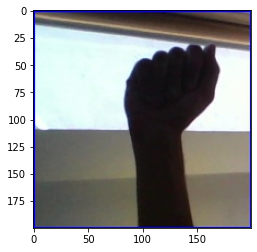

In [27]:
plt.imshow(img1)

In [28]:


data_generator1 = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

test_generated = data_generator1.flow_from_directory(test_dir,                       # path of images
                                                     target_size = (200,200),         # size of image
                                                     class_mode = 'categorical',
                                                     color_mode = 'rgb',
                                                     shuffle = True,
                                                     batch_size = 32                  # hyperparameter that defines the number of samples
                                                                                      #to work through before updating the internal model parameters
                                                    )



Found 28 images belonging to 1 classes.


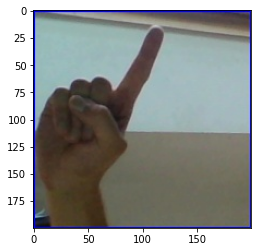

In [29]:
img2 = plt.imread(test_dir + '/' + list(test_images_names_and_paths.keys())[0] + '/' + list(test_images_names_and_paths.values())[0][27])
img2
plt.imshow(img2)

In [30]:
results = reconstructed_model.evaluate(test_generated)
print("test loss, test acc:", results)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Anon

In [33]:
reconstructed_model = keras.models.load_model("final_v3")

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:

In [34]:
categories = categories.remove('del')

AttributeError: 'NoneType' object has no attribute 'remove'

In [35]:
f = train_generated.class_indices

In [36]:
type(f)

dict

(1, 200, 200, 3)


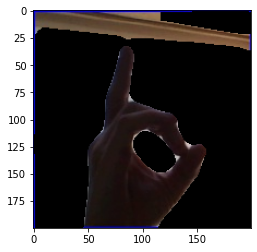

In [47]:
test_image1 = plt.imread(test_dir + '/' + list(test_images_names_and_paths.keys())[0] + '/' + list(test_images_names_and_paths.values())[0][3])
test_image = shs(test_image1)
plt.imshow(test_image.astype('uint8'))
test_image = np.array(test_image1).reshape( -1, 200,200, 3)
print(test_image.shape)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Option

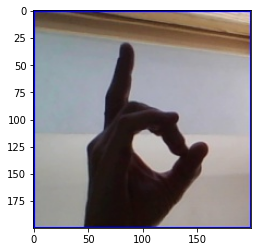

In [48]:
ax = plt.subplot(1,1,1)
ax.imshow(test_image.reshape(200,200,3))

prediction = reconstructed_model.predict(test_image)
print(prediction, np.argmax(prediction))
print("Labels: ",f)

In [ ]:
f